In [1]:
%matplotlib inline
import logging
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from nuwinter.neutrino import schedule_neutrino, parse_neutrino
from wintertoo.validate import validate_schedule_request
from winterapi import WinterAPI

In [2]:
logging.getLogger("nuwinter").setLevel("INFO")

In [3]:
winter = WinterAPI()

In [4]:
# Program details
program = "2024A001"

In [5]:
program_list = winter.get_programs()
print(f"Available programs: {program_list}")
assert program in program_list, f"program {program} not found! Add this program first."

Available programs: ['2023A000', '2023A001', '2023A002', '2023A004', '2023A012', '2023A999', '2024A000', '2024A001', '2024A002', '2024A006']


INFO:nuwinter.neutrino:Found GCN 36070 for IC240412A


{'node': {'id': 'Q2lyY3VsYXI6MzYwNzA=', 'id_': '36070', 'received': '2024-04-12T13:28:22', 'subject': 'IceCube-240412A - IceCube observation of a high-energy neutrino candidate track-like event', 'evtidCircular': {'event': 'IC 240412A'}, 'cid': 36070, 'evtid': 200249, 'oidCircular': {'telescope': 'IceCube', 'detector': None, 'oidEvent': {'wavelength': None, 'messenger': 'ν'}}}}
[WinterRaDecToO(ra_deg=102.15, dec_deg=6.42, use_field_grid=False, filters=['J'], target_priority=150.0, target_name='IC240412A_0', total_exposure_time=960.0, n_dither=8, n_repetitions=1, dither_distance=30.0, start_time_mjd=60413.98984534442, end_time_mjd=60420.98984534442, max_airmass=2.0, use_best_detector=False, single_exposure_time=120.0), WinterRaDecToO(ra_deg=103.15, dec_deg=6.42, use_field_grid=False, filters=['J'], target_priority=150.0, target_name='IC240412A_0', total_exposure_time=960.0, n_dither=8, n_repetitions=1, dither_distance=30.0, start_time_mjd=60413.98984534442, end_time_mjd=60420.9898453444

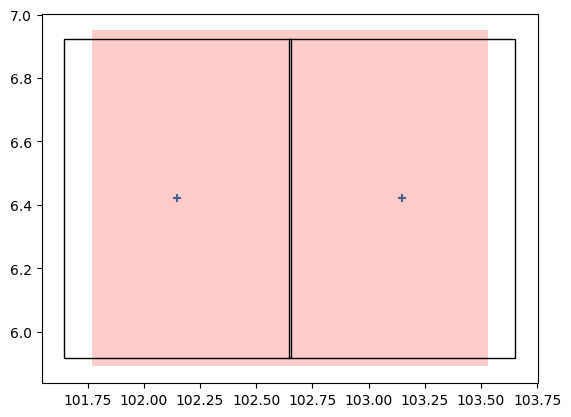

In [6]:
too_args = {
#     "t_exp": 600.0,
#     "n_dither": 5
    "filters": ["J"]
}

too_list = schedule_neutrino(
    "IC240412A", scale=1.0, mode="pair", make_plot=True, too_args=too_args, nights=[0, 0, 7],)
print(too_list)

In [7]:
local_schedule = winter.build_schedule_locally(
    program_name=program,
    data=too_list
)
local_schedule.sort_values(by=["filter", "validStart"], inplace=True)
local_schedule.reset_index(inplace=True)
local_schedule.drop(columns=["index"], inplace=True)
local_schedule["obsHistID"] = range(len(local_schedule))
local_schedule

,targName,raDeg,decDeg,fieldID,filter,visitExpTime,singleExpTime,priority,progPI,progName,progID,validStart,validStop,observed,maxAirmass,ditherNumber,ditherStepSize,bestDetector,obsHistID
0,IC240412A_0,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,0
1,IC240412A_0,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,1
2,IC240412A_1,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,2
3,IC240412A_1,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,3
4,IC240412A_2,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60420.989845,60427.989845,False,2.0,8,30.0,False,4
5,IC240412A_2,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60420.989845,60427.989845,False,2.0,8,30.0,False,5


In [16]:
api_res, api_schedule = winter.submit_too(
    program_name=program,
    data=too_list,
    submit_trigger=True
)
api_res

<Response [200]>

In [17]:
api_res.json()["msg"]

"Request passed validation! Triggering was set to True. Schedule name is 'request_2024A001_2024_04_13_16_57_37' ."

In [9]:
api_schedule

,targName,raDeg,decDeg,fieldID,filter,visitExpTime,singleExpTime,priority,progPI,progName,progID,validStart,validStop,observed,maxAirmass,ditherNumber,ditherStepSize,bestDetector,obsHistID
0,IC240412A_0,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,0
1,IC240412A_0,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,1
2,IC240412A_1,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,2
3,IC240412A_1,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60413.989845,60420.989845,False,2.0,8,30.0,False,3
4,IC240412A_2,102.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60420.989845,60427.989845,False,2.0,8,30.0,False,4
5,IC240412A_2,103.15,6.42,999999999,J,960.0,120.0,150.0,RStein,2024A001,3,60420.989845,60427.989845,False,2.0,8,30.0,False,5


In [18]:
res, queue = winter.get_observatory_queue(program_name=program)
print(res.json()["msg"])
queue

Returning schedule summary for 2024A001


,prog_name,attempted_frac,too_schedule_name,target_names,n_entries,total_time_hours,window_start,window_end
0,2024A001,0.0,request_2024A001_2024_04_13_16_57_37,"[IC240412A_0, IC240412A_1, IC240412A_2]",6,1.6,2024-04-13 23:45:22.638,2024-04-27 23:45:22.638


In [ ]:
# schedule_name="request_2024A001_2024_03_27_19_20_17"
# res = winter.delete_too_request(
#     too_schedule_name=schedule_name,
#     program_name=program
# )
# res.json()["msg"]